In [15]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__


'2.1.0.post100'

# Data Preparing and loading

In [16]:
# Create known parameters
weight = 0.7
bias = 0.3

# in linear reqgression, weight is 'b' and bias is 'a' from
# Y = a + bX

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
#unsqueeze adds one more bracket

In [17]:
# Splitting in training(60-80) and test(20-40) set

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test,y_test = X[train_split:], y[train_split:]


In [21]:
def plot_predictions(train_data=X_train, train_lables=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    #plots training daat, test data and compare predictiosn
    plt.figure(figsize=(10,7))
    #Plot training data in blue
    plt.scatter(train_data, train_lables, c="b", s=4, label="Training data")
    #Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    # plot predictions if exist

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Prediction")
    #legend
        
    plt.legend(prop={"size": 14});


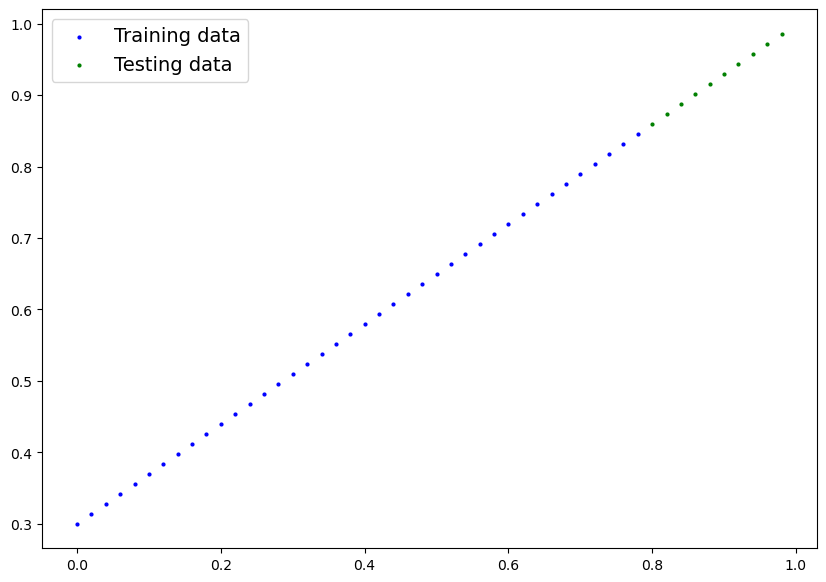

In [22]:
plot_predictions()

In [24]:
# create a model with param as A and B
# Create linear regression model class

class LinearRegressionModel(nn.Module): #inherits from nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True,dtype=torch.float))


    # Forward Method to define computation in Model
    # x is input data
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.weights * x + self.bias




What model does:
*  start with random values of weight and bias
* Look at training data and adjust the random vaues to get closer to ideal values


How it does?
1. Gradient Descent
2. Back propogation



### TOrch model building essentials

* torch.nn - contains all building blocks for Neural Network

* toech.nn.Parameter - Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd".

* torch.nn.Module - The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a f`orward()` method be implemented.

* torch.optim - Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

* `def forward()` All nn.Module subclasses require you to override forward(), this is what happens in forward computation


In [28]:
torch.manual_seed(57)

model_0 = LinearRegressionModel()

list(model_0.parameters())


[Parameter containing:
 tensor([0.1446], requires_grad=True),
 Parameter containing:
 tensor([-0.1165], requires_grad=True)]

In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.1446])), ('bias', tensor([-0.1165]))])

In [31]:
# Make predictions using torch.inference_mode()
# When we pass data to our model, it'll go through the model's forward() method and produce a result using the computation we've defined.

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

#inference reduces gradient

tensor([[-0.0008],
        [ 0.0021],
        [ 0.0050],
        [ 0.0079],
        [ 0.0108],
        [ 0.0136],
        [ 0.0165],
        [ 0.0194],
        [ 0.0223],
        [ 0.0252]])

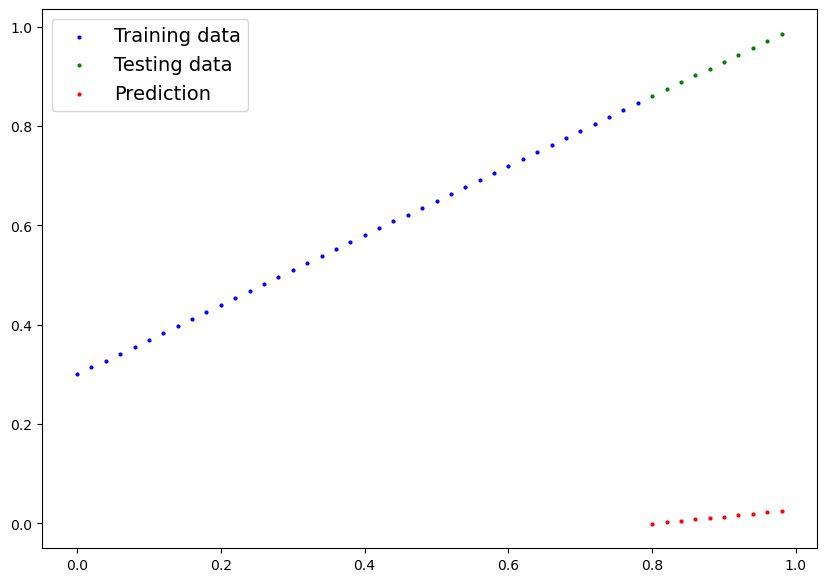

In [32]:
plot_predictions(predictions=y_preds)

In [ ]:
# idea of training is to move from randomm param to some known params

# One way to measure how poor or wrong your model predictions are is to use a loss func

# Loss func is also called cost func or criterion

# 5:45:41